<div style="font-size:16px; color:darkblue;">
    https://www.kaggle.com/jtrofe/beer-recipes
</div>

<div style="font-size:16px; color:darkblue;">
    BeerID - Record ID<br/>
    Name - Name<br/>
    URL - Location of recipe webpage at https://www.brewersfriend.com<br/>
    Style - Type of brew<br/>
    StyleID - Numeric ID for type of brew<br/>
    Size(L) - Amount brewed for recipe listed<br/>
    OG - Specific gravity of wort before fermentation<br/>
    FG - Specific gravity of wort after fermentation<br/>
    ABV - Alcohol By Volume<br/>
    IBU - International Bittering Units<br/>
    Color - Standard Reference Method - light to dark ex. 40 = black<br/>
    BoilSize - Fluid at beginning of boil<br/>
    BoilTime - Time wort is boiled<br/>
    BoilGravity - Specific gravity of wort before the boil<br/>
    Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash<br/>
    MashThickness - Amount of water per pound of grain<br/>
    SugarScale - Scale to determine the concentration of dissolved solids in wort<br/>
    BrewMethod - Various techniques for brewing<br/>
    PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P<br/>
    PrimaryTemp - Temperature at the fermenting stage<br/>
    PrimingMethod - Priming method used, e.g., corn sugar<br/>
    PrimingAmount - Amount of priming sugar used<br/>
    UserId
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import statsmodels.formula.api as sm
import scipy.stats as stats
import collections
import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pylab.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_rows = 20
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\megha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
!type recipeData.csv

ï»¿BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70,N/A,Specific Gravity,All Grain,N/A,17.78,corn sugar,4.5 oz,116
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.07,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,955
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-extract,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,N/A,70,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-all-grain,American IPA,7,22.71,1.061,1.017,5.8,54.48,8.5,26.5,60,N/A,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A

2975,Jim's No-no-no-no-no-no Dibley Chocolate,/homebrew/recipe/view/3832/jim-s-no-no-no-no-no-no-dibley-chocolate,Sweet Stout,162,22.71,1.052,1.015,4.9,30.9,32.37,11.36,50,N/A,70,N/A,Specific Gravity,extract,N/A,N/A,Priming Sugar,5 oz.,
2976,Caveman's Coffin,/homebrew/recipe/view/103826/caveman-s-coffin,American IPA,7,18.93,1.072,1.018,7.11,90.72,11.4,9.46,60,1.144,35,N/A,Specific Gravity,extract,0.5,18.33,N/A,N/A,23595
2977,Loriwood Red Ale,/homebrew/recipe/view/207/loriwood-red-ale,American Amber Ale,4,19.87,1.057,1.017,5.27,88.79,17.78,11.36,60,N/A,35,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,97
2978,Grapefruit Sculpin Clone,/homebrew/recipe/view/311811/grapefruit-sculpin-clone,American IPA,7,40.13,1.069,1.015,7.11,76.3,6.35,45.05,60,1.062,72,1.5,Specific Gravity,All Grain,0.75,N/A,N/A,N/A,
2979,???? (Phl?),/homebrew/recipe/view/204306/-phl-,Imperial IPA,86,23,1.075,1.007,8.83,60.8,6.07,16,75,1.037,60,N/A,Specific Gravity,Partial Mash,N/A,19,N/A,N/A,41262
2980,Galaxy/Mosaic IPA,/

4993,Snow Day Clone,/homebrew/recipe/view/280858/snow-day-clone,American IPA,7,20.82,1.057,1.012,5.85,55.98,35.15,28.39,60,1.041,70,1.5,Specific Gravity,All Grain,0.75,20,N/A,N/A,
4994,Greg Hughes' Amarillo Pale Ale (Ahtanum),/homebrew/recipe/view/271151/greg-hughes-amarillo-pale-ale-ahtanum-,American Pale Ale,10,10,1.051,1.011,5.26,46.17,5.65,14,70,1.036,70,3,Specific Gravity,All Grain,0.35,20,N/A,N/A,
4995,Rockabilly Maibock,/homebrew/recipe/view/57399/rockabilly-maibock,Maibock/Helles Bock,103,20.82,1.076,1.022,7.21,59.16,21.67,26.5,60,1.06,73,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,2568
4996,Aunt Hazel's Gingerbread Stout ALLGRAIN,/homebrew/recipe/view/89734/aunt-hazel-s-gingerbread-stout-allgrain,American Stout,12,20.82,1.074,1.023,6.74,91.16,32.04,28.39,60,1.049,50,N/A,Specific Gravity,All Grain,N/A,20,N/A,N/A,
4997,Oak Aged Amber,/homebrew/recipe/view/116417/oak-aged-amber,American Amber Ale,4,19,1.055,1.015,5.23,45.28,9.14,11,60,1.096,35,N/A,Specific Gravity,extract,0.5,

6974,Extract Alt Bier,/homebrew/recipe/view/123634/extract-alt-bier,Dusseldorf Altbier,51,19.87,1.048,1.012,4.76,51.24,11.53,10.41,60,1.058,35,N/A,Specific Gravity,extract,N/A,18.33,N/A,N/A,18665
6975,Imperial chili,/homebrew/recipe/view/218142/imperial-chili,Imperial IPA,86,11.36,1.113,1.032,10.71,72.03,16.98,15.14,60,1.085,35,N/A,Specific Gravity,extract,0.5,21.11,N/A,N/A,
6976,Neutral Brew,/homebrew/recipe/view/293693/neutral-brew,American Wheat Beer,14,45,1.039,1.008,4.13,21.18,2.68,54,60,1.033,78,3.8,Specific Gravity,All Grain,0.75,18,N/A,N/A,
6977,A Belgian Golden Strong Ale,/homebrew/recipe/view/206405/a-belgian-golden-strong-ale,Belgian Golden Strong Ale,23,18.93,1.093,1.021,9.39,32.94,5.6,22.71,60,1.077,70,1.2,Specific Gravity,All Grain,0.35,16.67,N/A,N/A,16892
6978,Russian River Pliny The Elder,/homebrew/recipe/view/192334/russian-river-pliny-the-elder,American IPA,7,20.82,1.083,1.021,8.21,283.22,6.99,28.39,60,1.061,80,1.5,Specific Gravity,All Grain,1,19.44,N/A,N/A,
6979,Omni

9387,2014-05: GPA #27 - Real (H),/homebrew/recipe/view/131528/2014-05-gpa-27-real-h-,American IPA,7,26.5,13.9121,1.81087,6.48,30.42,4.27,18,60,20,71,N/A,Plato,All Grain,1,17,N/A,N/A,260
9388,Bargain Bin IPA,/homebrew/recipe/view/182496/bargain-bin-ipa,Imperial IPA,86,11.4,1.076,1.017,7.65,99.39,11.05,13,60,1.066,70,N/A,Specific Gravity,BIAB,N/A,16,N/A,N/A,
9389,17 - Winki Pop bomb - IPA - 09-08-15,/homebrew/recipe/view/260064/17-winki-pop-bomb-ipa-09-08-15,American IPA,7,23.3,1.06,1.015,5.94,80.59,6.74,26,60,1.054,71,N/A,Specific Gravity,BIAB,N/A,19,N/A,N/A,42902
9390,Beer Hates Astronauts Clone,/homebrew/recipe/view/251365/beer-hates-astronauts-clone,American IPA,7,18.93,1.071,1.017,7.04,55.35,11.08,26.5,60,1.051,70,N/A,Specific Gravity,BIAB,0.75,N/A,N/A,N/A,
9391,Jarl clone,/homebrew/recipe/view/361704/jarl-clone,American Light Lager,9,19,1.038,1.009,3.84,38.18,2.71,26,60,1.028,60,3,Specific Gravity,All Grain,0.75,18,N/A,N/A,30626
9392,Black Watch Cascadian Dark Ale,/homebrew/recipe/

11473,Saison with Fruit,/homebrew/recipe/view/473049/saison-with-fruit,Saison,134,174.13,1.053,1.011,5.55,30.11,3.8,189.27,60,1.049,72,1.15,Specific Gravity,All Grain,N/A,17.78,N/A,N/A,53740
11474,Hoppy Saison,/homebrew/recipe/view/251107/hoppy-saison,Saison,134,21,1.061,1.017,5.83,34.82,4.77,28,60,1.046,50,3,Specific Gravity,All Grain,1,20,N/A,N/A,
11475,Big Red Machine (Red IPA),/homebrew/recipe/view/228068/big-red-machine-red-ipa-,American IPA,7,37.85,17.6691,4.62296,7.15,124.96,18.58,45.42,60,14.9,80,N/A,Plato,All Grain,N/A,N/A,N/A,N/A,
11476,Stout City V1.2,/homebrew/recipe/view/495851/stout-city-v1-2,Imperial Stout,87,22.71,1.096,1.023,9.57,79.58,38.36,29.15,60,1.075,65,N/A,Specific Gravity,BIAB,N/A,16.67,N/A,N/A,56565
11477,NEIPA #01,/homebrew/recipe/view/382465/neipa-01,American IPA,7,14,1.058,1.013,5.85,32.68,4.38,14,60,1.058,62,3,Specific Gravity,All Grain,N/A,18,N/A,N/A,
11478,Late Sorachi Ace PA,/homebrew/recipe/view/228376/late-sorachi-ace-pa,American Pale Ale,10,19.5,1.05

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




35469,Le pew pew pew,/homebrew/recipe/view/279143/le-pew-pew-pew,Belgian Dark Strong Ale,21,28,1.088,1.012,9.97,32.51,22.5,50,60,1.049,68,2.7,Specific Gravity,All Grain,1,22,N/A,N/A,
35470,Get Rich Quick,/homebrew/recipe/view/421737/get-rich-quick,Russian Imperial Stout,132,20.82,1.076,1.024,6.88,29.74,50,28.39,60,1.056,72,1.5,Specific Gravity,All Grain,N/A,20,N/A,N/A,
35471,Colcha,/homebrew/recipe/view/326761/colcha,KÃ¶lsch,94,20.82,1.048,1.012,4.69,29.1,4.96,28.39,90,1.035,72,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
35472,Squirrel's Nuts,/homebrew/recipe/view/207724/squirrel-s-nuts,Special/Best/Premium Bitter,144,23,1.046,1.013,4.37,37.72,5.4,32,75,1.033,68,2.5,Specific Gravity,All Grain,0.35,18,Corn Sugar,60g (For bottling),
35473,Irish Red 12/09,/homebrew/recipe/view/277101/irish-red-12-09,Irish Red Ale,92,210,1.043,1.011,4.25,25.71,14.24,240,60,1.038,70,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
35474,Berliner First Take,/homebrew/recipe/view/389997/berliner-first-tak

37968,Baby belgian,/homebrew/recipe/view/252489/baby-belgian,Belgian Specialty Ale,25,359.61,1.043,1.011,4.26,16.73,4.68,397.47,60,1.039,66,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
37969,Mosaic Nation Imperial IPA  (Hana's Bad Ass ...,/homebrew/recipe/view/480330/mosaic-nation-imperial-ipa-hana-s-bad-ass-ipa-,Imperial IPA,86,18.93,1.1,1.024,10,112.07,9.65,41.64,75,1.045,67,1.33,Specific Gravity,All Grain,0.35,20,N/A,N/A,14037
37970,India Brown Ale,/homebrew/recipe/view/298314/india-brown-ale,American Brown Ale,6,21,1.067,1.014,7.07,59.65,19.58,26,60,1.051,75,2.8,Specific Gravity,All Grain,0.5,19,co2,N/A,
37971,Black IPA,/homebrew/recipe/view/381003/black-ipa,Specialty IPA: Black IPA,148,23,1.045,1.01,4.51,45.37,24.54,28.5,60,1.036,70,2,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
37972,Black Heat,/homebrew/recipe/view/258891/black-heat,American Brown Ale,6,25,1.062,1.012,6.63,67.09,24.23,30,60,1.052,77,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
37973,Yucky Winter Ale,/homebr

39967,German Session IPA,/homebrew/recipe/view/298333/german-session-ipa,American IPA,7,20.82,1.052,1.013,5.14,48.56,6.78,28.39,60,1.038,70,2,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
39968,Panthers milk,/homebrew/recipe/view/330846/panthers-milk,Oatmeal Stout,114,20.82,1.085,1.029,7.28,55.65,46.4,28.39,60,1.062,70,N/A,Specific Gravity,All Grain,N/A,21.11,N/A,N/A,
39969,Am IPA,/homebrew/recipe/view/384096/am-ipa,American IPA,7,23,1.055,1.009,6,54.85,4.09,27,60,1.047,70,3,Specific Gravity,All Grain,N/A,22,N/A,N/A,
39970,Barking nikko strong ale,/homebrew/recipe/view/408418/barking-nikko-strong-ale,Old Ale,116,18.93,1.083,1.023,7.94,42.94,21.19,30.28,90,1.052,55,1.25,Specific Gravity,All Grain,1,N/A,N/A,N/A,
39971,Dark Coffee Porter,/homebrew/recipe/view/460387/dark-coffee-porter,American Porter,11,18.93,1.057,1.016,5.4,35.02,28.14,11.36,60,1.095,35,N/A,Specific Gravity,extract,0.35,20,Dextrose,4oz,
39972,Pale Ale,/homebrew/recipe/view/450661/pale-ale,Belgian Pale Ale,24,50,1.053,1.018

42467,Witbeer,/homebrew/recipe/view/411354/witbeer,Witbier,175,46,1.053,1.011,5.45,11.13,3.59,54,60,1.045,88,N/A,Specific Gravity,BIAB,0.75,20,DME,106g,
42468,Red Iain,/homebrew/recipe/view/450010/red-iain,Specialty IPA: Red IPA,150,12,1.069,1.017,6.88,90.42,14.14,15,60,1.055,65,2.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
42469,Tom Brown/Irish Ale,/homebrew/recipe/view/345819/tom-brown-irish-ale,Irish Red Ale,92,20.82,1.069,1.016,6.99,30.98,18.41,28.39,60,1.051,70,1.5,Specific Gravity,All Grain,0.35,20,N/A,N/A,
42470,Hoppy Pale still working,/homebrew/recipe/view/245980/hoppy-pale-still-working,American Pale Ale,10,37.85,1.059,1.015,5.81,57.96,9.9,41.64,60,1.054,70,1.1,Specific Gravity,All Grain,0.35,18.89,N/A,N/A,
42471,Backyard IPA 3.0,/homebrew/recipe/view/394206/backyard-ipa-3-0,Double IPA,56,20.82,1.074,1.013,7.97,220.54,10.7,28.39,60,1.054,70,1.5,Specific Gravity,All Grain,0.5,20,N/A,N/A,
42472,Apple Jacks,/homebrew/recipe/view/514015/apple-jacks,Common Cider,44,20.82,1.051,1

44466,SNIPA,/homebrew/recipe/view/370811/snipa,American IPA,7,42,1.06,1.015,5.86,93.44,6.38,52,60,1.048,70,1,Specific Gravity,All Grain,N/A,20,N/A,N/A,
44467,Bob Light 2.0,/homebrew/recipe/view/437885/bob-light-2-0,Blonde Ale,30,9.46,1.038,1.009,3.83,26.55,3.63,7.57,60,1.048,62,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
44468,American Wheat,/homebrew/recipe/view/185727/american-wheat,American Wheat Beer,14,20,1.048,1.007,5.36,15.99,4.67,24,60,1.04,70,3,Specific Gravity,All Grain,0.75,18,N/A,N/A,31003
44469,Pils,/homebrew/recipe/view/378496/pils,German Pilsner (Pils),81,21,1.04,1.006,4.49,78.69,5.14,28.5,60,1.029,69,3,Specific Gravity,All Grain,N/A,12,N/A,N/A,
44470,Double AmbrÃ©e,/homebrew/recipe/view/457088/,Belgian Dubbel,22,9.5,1.066,1.008,7.68,18.02,13.1,12,70,1.052,78,N/A,Specific Gravity,Partial Mash,N/A,22,N/A,N/A,
44471,Imperial Rye Porter,/homebrew/recipe/view/501889/imperial-rye-porter,American Porter,11,23,1.085,1.018,8.86,35.71,34.74,28,90,1.07,70,N/A,Specific Gravity,

46966,Mexican Honey Clone,/homebrew/recipe/view/514170/mexican-honey-clone,American Lager,8,22.71,1.076,1.014,8.11,14.85,4.31,30.28,60,1.057,85,1.5,Specific Gravity,All Grain,N/A,12.22,N/A,N/A,
46967,Cousin,/homebrew/recipe/view/280447/cousin,California Common Beer,39,28.39,1.092,1.023,9.04,67.64,8.51,37.85,60,1.069,35,N/A,Specific Gravity,Partial Mash,N/A,20,N/A,N/A,
46968,Two Hearted Clone,/homebrew/recipe/view/468096/two-hearted-clone,American IPA,7,37.85,1.063,1.013,6.54,72.51,4.8,45.42,60,1.053,75,1.5,Specific Gravity,All Grain,0.5,21.11,N/A,N/A,
46969,Awesome Recipe,/homebrew/recipe/view/237184/awesome-recipe,California Common Beer,39,24,1.045,1.014,4.13,12.87,23.42,9,30,1.12,35,N/A,Specific Gravity,Partial Mash,0.5,20,N/A,N/A,
46970,Cafe au Lait December 2016  Stout,/homebrew/recipe/view/415361/cafe-au-lait-december-2016-stout,Sweet Stout,162,151.42,1.052,1.017,4.58,31.04,39.8,170.34,60,1.046,70,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,48033
46971,PG-Perle IPA,/homebrew/re

48965,Hefe,/homebrew/recipe/view/505623/hefe,Weissbier,169,5.68,1.051,1.012,5.11,10.8,3.72,13.25,90,1.022,65,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
48966,Freddes julÃ¶l,/homebrew/recipe/view/410648/,American Brown Ale,6,15,1.061,1.015,6.08,34.66,20.24,19,60,1.048,75,N/A,Specific Gravity,BIAB,N/A,N/A,Cane sugar,63,
48967,Juergens's IPA,/homebrew/recipe/view/343066/juergens-s-ipa,American IPA,7,20.82,1.068,1.017,6.66,95.14,19.26,28.39,60,1.05,60,1.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
48968,Paz en Colombia,/homebrew/recipe/view/379162/paz-en-colombia,American IPA,7,30,1.061,1.012,6.49,43.71,13.51,43,70,1.043,65,2.5,Specific Gravity,All Grain,N/A,20,N/A,N/A,
48969,Irish Ale,/homebrew/recipe/view/400166/irish-ale,Irish Red Ale,92,20.82,1.053,1.014,5.06,41.97,13.57,28.39,60,1.039,65,1.5,Specific Gravity,All Grain,0.5,18.33,N/A,N/A,72982
48970,Bitter julebukk - 2016,/homebrew/recipe/view/409382/bitter-julebukk-2016,Extra Special/Strong Bitter (ESB),68,38,1.062,1.017,6.14,36.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



69961,Strawberry Vanilla Milkshake,/homebrew/recipe/view/611218/strawberry-vanilla-milkshake,American IPA,7,19.87,1.071,1.024,6.22,164.79,7,26.5,60,1.053,70,N/A,Specific Gravity,BIAB,0.75,18.89,N/A,N/A,
69962,ADIPA 2/10/18,/homebrew/recipe/view/607123/adipa-2-10-18,American IPA,7,24.61,1.04,1.009,4.05,57.85,9.64,26.5,60,1.037,66,N/A,Specific Gravity,BIAB,N/A,15.56,N/A,N/A,
69963,Apa centennial,/homebrew/recipe/view/581525/apa-centennial,American Pale Ale,10,30,1.053,1.01,5.64,39.05,9.32,40.2,60,1.04,75,2.5,Specific Gravity,All Grain,0.5,20,N/A,N/A,54049
69964,DQ1,/homebrew/recipe/view/587157/dq1,American Light Lager,9,28,1.051,1.013,5.03,24.19,4.42,15,65,1.095,35,N/A,Specific Gravity,extract,N/A,18,N/A,N/A,
69965,IPL Brygg 61 - Kun Mosaic tÃ¸rrhumling,/homebrew/recipe/view/598166/,International Pale Lager,90,23,1.048,1.009,5.08,46.29,6.57,31,90,1.036,60,2.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
69966,Winter Ale,/homebrew/recipe/view/578966/winter-ale,American Amber Ale,4,18.93,1.

72460,Mac's Brown Ale (Partial Mash),/homebrew/recipe/view/609133/mac-s-brown-ale-partial-mash-,British Brown Ale,34,20.82,1.054,1.013,5.44,23.2,22.31,15.14,60,1.074,60,N/A,Specific Gravity,Partial Mash,0.35,22.22,N/A,N/A,
72461,Magnum SMaSH,/homebrew/recipe/view/614003/magnum-smash,Strong Bitter,159,5.68,1.058,1.017,5.34,29.98,6.99,9.46,60,1.035,60,1.5,Specific Gravity,All Grain,N/A,20,N/A,N/A,
72462,Charmingly Strange,/homebrew/recipe/view/603765/charmingly-strange,Saison,134,18.93,1.048,1.007,5.39,38.42,11.73,12.3,60,1.074,55,N/A,Specific Gravity,BIAB,N/A,22.78,N/A,N/A,
72463,American Amber's Ways to Grain,/homebrew/recipe/view/610422/american-amber-s-ways-to-grain,American Amber Ale,4,19,1.052,1.009,5.74,37.77,13.33,25,60,1.04,75,3,Specific Gravity,All Grain,N/A,19,N/A,N/A,
72464,PFriem mosaic pale,/homebrew/recipe/view/610934/pfriem-mosaic-pale,American Pale Ale,10,13.25,1.063,1.014,6.41,39.17,6.45,17.03,60,1.049,75,1.8,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,17196
72465,Grodzi

In [3]:
df = pd.read_csv ('recipeData.csv')
df

BeerID                                          Name  \
0           1                             Vanilla Cream Ale   
1           2                   Southern Tier Pumking clone   
2           3                   Zombie Dust Clone - EXTRACT   
3           4                 Zombie Dust Clone - ALL GRAIN   
4           5               Bakke Brygg Belgisk Blonde 50 l   
5           6                  Sierra Nevada Pale Ale Clone   
6           7      Russian River Pliny the Elder (original)   
7           8  Spotted Clown (New Glarus Spotted Cow clone)   
8           9                      Chocolate Vanilla Porter   
9          10                            Mango Habanero IPA   
...       ...                                           ...   
73851   73852                                  Blonde Stout   
73852   73853                                Session Simcoe   
73853   73854                          Chris ford wheat ipa   
73854   73855                          X Files American Ale   
73855   73856                                   Unicorn Pee   
73856   73857                                 Amber Alfie 2   
73857   73858                                       Rye IPA   
73858   73859                                     SK-Kölsch   
73859   73860                               Flata Rødkløver   
73860   73861                         Elvis Juice IPA Clone   

                                                     URL  \
0           /homebrew/recipe/view/1633/vanilla-cream-ale   
1      /homebrew/recipe/view/16367/southern-tier-pumk...   
2      /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3      /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4      /homebrew/recipe/view/89534/bakke-brygg-belgis...   
5      /homebrew/recipe/view/28546/sierra-nevada-pale...   
6      /homebrew/recipe/view/37534/russian-river-plin...   
7      /homebrew/recipe/view/672/spotted-clown-new-gl...   
8      /homebrew/recipe/view/29265/chocolate-vanilla-...   
9         /homebrew/recipe/view/61082/mango-habanero-ipa   
...                                                  ...   
73851          /homebrew/recipe/view/615556/blonde-stout   
73852        /homebrew/recipe/view/618629/session-simcoe   
73853  /homebrew/recipe/view/602248/chris-ford-wheat-ipa   
73854  /homebrew/recipe/view/603016/x-files-american-ale   
73855           /homebrew/recipe/view/607368/unicorn-pee   
73856         /homebrew/recipe/view/609673/amber-alfie-2   
73857               /homebrew/recipe/view/610955/rye-ipa   
73858                      /homebrew/recipe/view/586891/   
73859                      /homebrew/recipe/view/603788/   
73860  /homebrew/recipe/view/613776/elvis-juice-ipa-c...   

                                    Style  StyleID  Size(L)     OG     FG  \
0                               Cream Ale       45    21.77  1.055  1.013   
1      Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
2                            American IPA        7    18.93  1.063  1.018   
3                            American IPA        7    22.71  1.061  1.017   
4                       Belgian Blond Ale       20    50.00  1.060  1.010   
5                       American Pale Ale       10    24.61  1.055  1.013   
6                            Imperial IPA       86    22.71  1.072  1.018   
7                               Cream Ale       45    20.82  1.054  1.014   
8                           Robust Porter      129    22.71  1.060  1.016   
9                            Imperial IPA       86    20.82  1.080  1.017   
...                                   ...      ...      ...    ...    ...   
73851                   Experimental Beer       67    20.82  1.076  1.021   
73852                   American Pale Ale       10    21.00  1.038  1.008   
73853                        American IPA        7    18.93  1.073  1.018   
73854                   American Pale Ale       10    18.93  1.064  1.016   
73855                        American IPA        7    22.71  1.065 

In [4]:
df.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [5]:
df.shape

(73861, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [7]:
df.describe()

BeerID       StyleID       Size(L)            OG            FG  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean   36931.000000     60.179432     43.929775      1.406266      1.075865   
std    21321.978453     56.811462    180.373492      2.196908      0.432524   
min        1.000000      1.000000      1.000000      1.000000     -0.003000   
25%    18466.000000     10.000000     18.930000      1.051000      1.011000   
50%    36931.000000     35.000000     20.820000      1.058000      1.013000   
75%    55396.000000    111.000000     23.660000      1.069000      1.017000   
max    73861.000000    176.000000   9200.000000     34.034500     23.424600   

                ABV           IBU         Color      BoilSize      BoilTime  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean       6.136865     44.276186     13.404989     49.724919     65.074870   
std        1.883510     42.945508     11.944511    193.246427     15.024228   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        5.080000     23.370000      5.170000     20.820000     60.000000   
50%        5.790000     35.770000      8.440000     27.440000     60.000000   
75%        6.830000     56.380000     16.790000     30.000000     60.000000   
max       54.720000   3409.300000    186.000000   9700.000000    240.000000   

        BoilGravity    Efficiency  MashThickness     PitchRate   PrimaryTemp  \
count  70871.000000  73861.000000   43997.000000  34609.000000  51199.000000   
mean       1.353955     66.354881       2.127235      0.750468     19.175641   
std        1.930989     14.091686       1.682347      0.394262      4.219676   
min        0.000000      0.000000       0.000000      0.000000    -17.780000   
25%        1.040000     65.000000       1.500000      0.350000     18.000000   
50%        1.047000     70.000000       1.500000      0.750000     20.000000   
75%        1.060000     75.000000       3.000000      1.000000     20.000000   
max       52.600000    100.000000     100.000000      2.000000    114.000000   

              UserId  
count   23371.000000  
mean    43078.069188  
std     27734.252556  
min        49.000000  
25%     20984.000000  
50%     42897.000000  
75%     57841.000000  
max    134362.000000

<div style="font-size:16px; color:darkblue;">
    This is a dataset of 75,000 homebrewed beers with over 176 different styles.<br/>
    Beer records are user-reported and are classified according to one of the 176 different styles.<br/>
    These recipes go into as much or as little detail as the user provided, but there's are least 
    5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, 
    and Color
</div>

<div style="font-size:16px; color:darkblue;">
    What goes into homemade beer?<br/>
    It would be interesting to see if the data provided is enough to define each class or if there 
    are undiscovered patterns. In the future it might be possible to go through and scrape more 
    detailed information for each recipe, such as the yeast and specific hops used.
</div>

In [8]:
df = df.drop('URL', axis=1)

In [9]:
df = df.drop('BeerID', axis=1)

In [10]:
df = df.drop('UserId', axis=1)

In [11]:
df

Name  \
0                                 Vanilla Cream Ale   
1                       Southern Tier Pumking clone   
2                       Zombie Dust Clone - EXTRACT   
3                     Zombie Dust Clone - ALL GRAIN   
4                   Bakke Brygg Belgisk Blonde 50 l   
5                      Sierra Nevada Pale Ale Clone   
6          Russian River Pliny the Elder (original)   
7      Spotted Clown (New Glarus Spotted Cow clone)   
8                          Chocolate Vanilla Porter   
9                                Mango Habanero IPA   
...                                             ...   
73851                                  Blonde Stout   
73852                                Session Simcoe   
73853                          Chris ford wheat ipa   
73854                          X Files American Ale   
73855                                   Unicorn Pee   
73856                                 Amber Alfie 2   
73857                                       Rye IPA   
73858                                     SK-Kölsch   
73859                               Flata Rødkløver   
73860                         Elvis Juice IPA Clone   

                                    Style  StyleID  Size(L)     OG     FG  \
0                               Cream Ale       45    21.77  1.055  1.013   
1      Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
2                            American IPA        7    18.93  1.063  1.018   
3                            American IPA        7    22.71  1.061  1.017   
4                       Belgian Blond Ale       20    50.00  1.060  1.010   
5                       American Pale Ale       10    24.61  1.055  1.013   
6                            Imperial IPA       86    22.71  1.072  1.018   
7                               Cream Ale       45    20.82  1.054  1.014   
8                           Robust Porter      129    22.71  1.060  1.016   
9                            Imperial IPA       86    20.82  1.080  1.017   
...                                   ...      ...      ...    ...    ...   
73851                   Experimental Beer       67    20.82  1.076  1.021   
73852                   American Pale Ale       10    21.00  1.038  1.008   
73853                        American IPA        7    18.93  1.073  1.018   
73854                   American Pale Ale       10    18.93  1.064  1.016   
73855                        American IPA        7    22.71  1.065  1.014   
73856                  British Strong Ale       36    21.00  1.052  1.012   
73857              Specialty IPA: Rye IPA      151    10.00  1.059  1.010   
73858                                 NaN      111    16.00  1.046  1.008   
73859                       Irish Red Ale       92    24.00  1.051  1.014   
73860                        American IPA        7    20.00  1.060  1.010   

        ABV     IBU  Color  BoilSize  BoilTime  BoilGravity  Efficiency  \
0      5.48   17.65   4.83     28.39        75        1.038        70.0   
1      8.16   60.65  15.64     24.61        60        1.070        70.0   
2      5.91   59.25   8.98     22.71        60          NaN        70.0   
3      5.80   54.48   8.50     26.50        60          NaN        70.0   
4      6.48   17.84   4.57     60.00        90        1.050        72.0   
5      5.58   40.12   8.00     29.34        70        1.047        79.0   
6      7.09  268.71   6.33     30.28        90          NaN        75.0   
7      5.36   19.97   5.94     28.39        75        1.040        70.0   
8      5.77   31.63  34.76     30.28        75        1.042        73.0   
9      8.22   93.02   8.29     28.39        60        1.058        70.0   
...     ...     ...    ...       ...       ...          ...         ...   
73851  7.24   52.94   7.25     15.14        60        1.105        75.0   
73852  4.05   36.60  10.04     28.50        60        1.028        70.0   
73853  7.15    0.00   6.01     22.71        60        1.060        70.0   
73854  6.26    0

In [12]:
df.isnull().sum()

Name                 1
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
dtype: int64

In [13]:
df.loc[df['Style'].isnull()]

Name Style  StyleID  \
38                                   Rochefort 8 Clone   NaN      111   
87     Zatarain's Root Beer - Non-Alcoholic  keg in...   NaN      111   
192                                          Hop Cliff   NaN      111   
347                                         Mosaic IPL   NaN      111   
577                                        Nanny state   NaN      111   
816              New world XII (westvleteren 12 clone)   NaN      111   
944                                     Australian IPA   NaN      111   
1002                                 Maris Otter sMasH   NaN      111   
1107                       Quilter's Irish Death Clone   NaN      111   
1178                                           Heimeøl   NaN      111   
...                                                ...   ...      ...   
72863                                      Yellow rose   NaN      111   
72887                                           Deneme   NaN      111   
72938                                             Bass   NaN      111   
72954                                  Amber Christmas   NaN      111   
73354                             Pennsylvania Swankey   NaN      111   
73413                                    Summer saison   NaN      111   
73600                                        Cara  Red   NaN      111   
73634                                  Wit Easter Beer   NaN      111   
73700                                Chinook the Crook   NaN      111   
73858                                        SK-Kölsch   NaN      111   

       Size(L)     OG     FG    ABV    IBU  Color  BoilSize  BoilTime  \
38       18.93  1.079  1.019   7.90   0.00  29.40     24.26        60   
87       18.93  1.046  1.013   4.27   0.00   3.99     11.36         0   
192      18.93  1.093  1.023   9.12   0.00  14.07     18.93        60   
347      20.82  1.063  1.016   6.16  68.35   7.67     28.39        60   
577      20.00  1.008  1.006   0.30  55.43  11.39     25.00        60   
816      20.82  1.105  1.024  10.67  49.40  25.37     28.39        90   
944      18.93  1.053  1.015   5.05  46.43   9.92      9.46        60   
1002     23.00  1.048  1.014   4.56  31.09   5.56     28.50        90   
1107     18.93  1.071  1.018   6.93   0.00  18.67     18.93        60   
1178     25.00  1.078  1.019   7.64   0.00   3.60      1.00         0   
...        ...    ...    ...    ...    ...    ...       ...       ...   
72863    20.82  1.033  1.006   3.52  68.81   3.81     20.82        60   
72887    23.00  1.060  1.014   6.05  17.17  12.57     33.00        70   
72938    20.82  1.051  1.016   4.65  45.28   9.97     23.66        60   
72954    25.00  1.062  1.011   6.74  57.65  11.89     30.00        90   
73354    20.82  1.039  1.005   4.50  13.28   2.93     11.36        60   
73413    18.93  1.064  1.019   5.84  31.69   7.93     11.36        60   
73600    22.71  1.046  1.010   4.61  68.81  11.82     28.39        60   
73634    21.00  1.025  1.006   2.52   7.43   3.24     28.50        60   
73700    20.82  1.055  1.010   5.90  68.19   7.55     26.50        60   
73858    16.00  1.046  1.008   5.01  25.42   3.63     18.00        90   

       BoilGravity  Efficiency  MashThickness        SugarScale    BrewMethod  \
38             NaN        65.0            NaN  Specific Gravity     All Grain   
87           1.077       100.0            NaN  Specific Gravity          BIAB   
192            NaN        75.0            NaN  Specific Gravity  Partial Mash   
347            NaN        78.0            NaN  Specific Gravity     All Grain   
577          1.006        70.0           3.00  Specific Gravity     All Grain   
816            NaN        75.0            NaN  Specific Gravity     All Grain   
944            NaN        70.0            NaN  Specific Gravity       extract   
1002           NaN        70.0            NaN  Specific Gravity          BIAB   
1107           NaN        75.0           1.25  Specific Gravity     All Grain   
1178           NaN        

<div style="font-size:16px; color:darkblue;">
     The 596 null style rows are dropped because their style id is 111 which is null.
</div>

<div style="font-size:16px; color:darkblue;">
    The single null name entry is removed since names are analyzed below.
</div>

In [14]:
dfStyle = pd.read_csv('styleData.csv')
dfStyle

Style  StyleID
0                   Altbier        1
1    Alternative Grain Beer        2
2    Alternative Sugar Beer        3
3        American Amber Ale        4
4       American Barleywine        5
5        American Brown Ale        6
6              American IPA        7
7            American Lager        8
8      American Light Lager        9
9         American Pale Ale       10
..                      ...      ...
166            Vienna Lager      167
167               Wee Heavy      168
168               Weissbier      169
169        Weizen/Weissbier      170
170              Weizenbock      171
171               Wheatwine      172
172     Wild Specialty Beer      173
173    Winter Seasonal Beer      174
174                 Witbier      175
175          Wood-Aged Beer      176

[176 rows x 2 columns]

In [15]:
dfStyle.loc[dfStyle['StyleID']==111]

Style  StyleID
110   NaN      111

In [16]:
df = df[df['Style'].notnull()]
df = df[df['Name'].notnull()]

In [17]:
df.isnull().sum()

Name                 0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66520
PrimingAmount    68510
dtype: int64

In [18]:
100*df['PrimingAmount'].isnull().sum()/len(df)

93.51113780301375

In [19]:
100*df['PrimingMethod'].isnull().sum()/len(df)

90.79493339157021

<div style="font-size:16px; color:darkblue;">
    PrimingMethod and PrimingAmount have more than 90% missing data, so it is better to drop these features.
</div>

In [20]:
dfClean = df.drop(['PrimingMethod','PrimingAmount'],axis=1)

In [21]:
dfClean.isnull().sum()

Name                 0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
dtype: int64

<div style="font-size:16px; color:darkblue;">
    Using Yumi's method fill in missing value with medians.
</div>

In [22]:
dfClean['BoilGravity'].fillna(dfClean['BoilGravity'].median(),inplace=True)
dfClean['MashThickness'].fillna(dfClean['MashThickness'].median(),inplace=True)
dfClean['PitchRate'].fillna(dfClean['PitchRate'].median(),inplace=True)
dfClean['PrimaryTemp'].fillna(dfClean['PrimaryTemp'].median(),inplace=True)

In [23]:
dfClean.isnull().sum()

Name             0
Style            0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

<div style="font-size:16px; color:darkblue;">
    https://www.brewersfriend.com/abv-calculator/ (\*)<br/>
    https://www.brewersfriend.com/brix-converter/ (\*\*)<br/>
    If we pay attention to SugarScale column, the data for 'OG' and 'FG' has two different scale, 'Specific Gravity' and 'Plato'<br/>
    We need to convert all 'OG' and 'FG' data to one scale for the regression model to train correctly
    I borrowed the formula from the links above (\*)(\*\*)<br/>
    Conversion from 'PLATO' to 'Specific Gravity'
</div>

In [24]:
def plTOsg(PL):
    SG = (PL / (258.6-((PL / 258.2)*227.1))) + 1
    return SG

In [25]:
plTOsg(22)

1.0919540676449373

In [26]:
idx = dfClean[dfClean['SugarScale'] == 'Plato'].index

In [27]:
dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']]

OG       FG
37     13.9618  3.48530
272    15.0428  3.75321
273    13.1874  3.61072
418    16.6131  4.33412
419    15.4102  4.48111
480    13.4728  3.10738
485    23.6839  5.83082
546    19.5274  3.71451
555    13.1223  2.58355
590    14.0295  2.64942
...        ...      ...
73405  18.3008  2.89791
73422  13.3917  3.05153
73434  18.1252  5.49810
73496  13.6374  1.97744
73508  17.3582  3.87207
73589  15.6985  3.65251
73590  14.4405  3.01395
73612  13.3425  3.45005
73695  15.1843  3.00776
73797  11.7154  2.85418

[1885 rows x 2 columns]

In [28]:
dfClean.loc[idx,['OG','FG']] = dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']].apply(plTOsg)

In [29]:
dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']]

OG        FG
37     1.056682  1.013639
272    1.061307  1.014701
273    1.053390  1.014136
418    1.068090  1.017011
419    1.062887  1.017597
480    1.054601  1.012145
485    1.099609  1.023004
546    1.080884  1.014548
555    1.053114  1.010079
590    1.056970  1.010338
...         ...       ...
73405  1.075466  1.011318
73422  1.054257  1.011924
73434  1.074694  1.021666
73496  1.055301  1.007698
73508  1.071335  1.015173
73589  1.064130  1.014302
73590  1.058725  1.011776
73612  1.054048  1.013500
73695  1.061915  1.011751
73797  1.047183  1.011145

[1885 rows x 2 columns]

In [30]:
dfClean.head()

Name                               Style  \
0                Vanilla Cream Ale                           Cream Ale   
1      Southern Tier Pumking clone  Holiday/Winter Special Spiced Beer   
2      Zombie Dust Clone - EXTRACT                        American IPA   
3    Zombie Dust Clone - ALL GRAIN                        American IPA   
4  Bakke Brygg Belgisk Blonde 50 l                   Belgian Blond Ale   

   StyleID  Size(L)     OG     FG   ABV    IBU  Color  BoilSize  BoilTime  \
0       45    21.77  1.055  1.013  5.48  17.65   4.83     28.39        75   
1       85    20.82  1.083  1.021  8.16  60.65  15.64     24.61        60   
2        7    18.93  1.063  1.018  5.91  59.25   8.98     22.71        60   
3        7    22.71  1.061  1.017  5.80  54.48   8.50     26.50        60   
4       20    50.00  1.060  1.010  6.48  17.84   4.57     60.00        90   

   BoilGravity  Efficiency  MashThickness        SugarScale BrewMethod  \
0        1.038        70.0            1.5  Specific Gravity  All Grain   
1        1.070        70.0            1.5  Specific Gravity  All Grain   
2        1.047        70.0            1.5  Specific Gravity    extract   
3        1.047        70.0            1.5  Specific Gravity  All Grain   
4        1.050        72.0            1.5  Specific Gravity  All Grain   

   PitchRate  PrimaryTemp  
0       0.75        17.78  
1       0.75        20.00  
2       0.75        20.00  
3       0.75        20.00  
4       0.75        19.00

In [31]:
dfClean.loc[idx,['SugarScale']]='Specific Gravity'

In [32]:
dfClean[dfClean['SugarScale'] == 'Plato'].count()

Name             0
Style            0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

<div style="font-size:16px; color:darkblue;">
    Scatter plots and heat maps to see correlations in data.
</div>

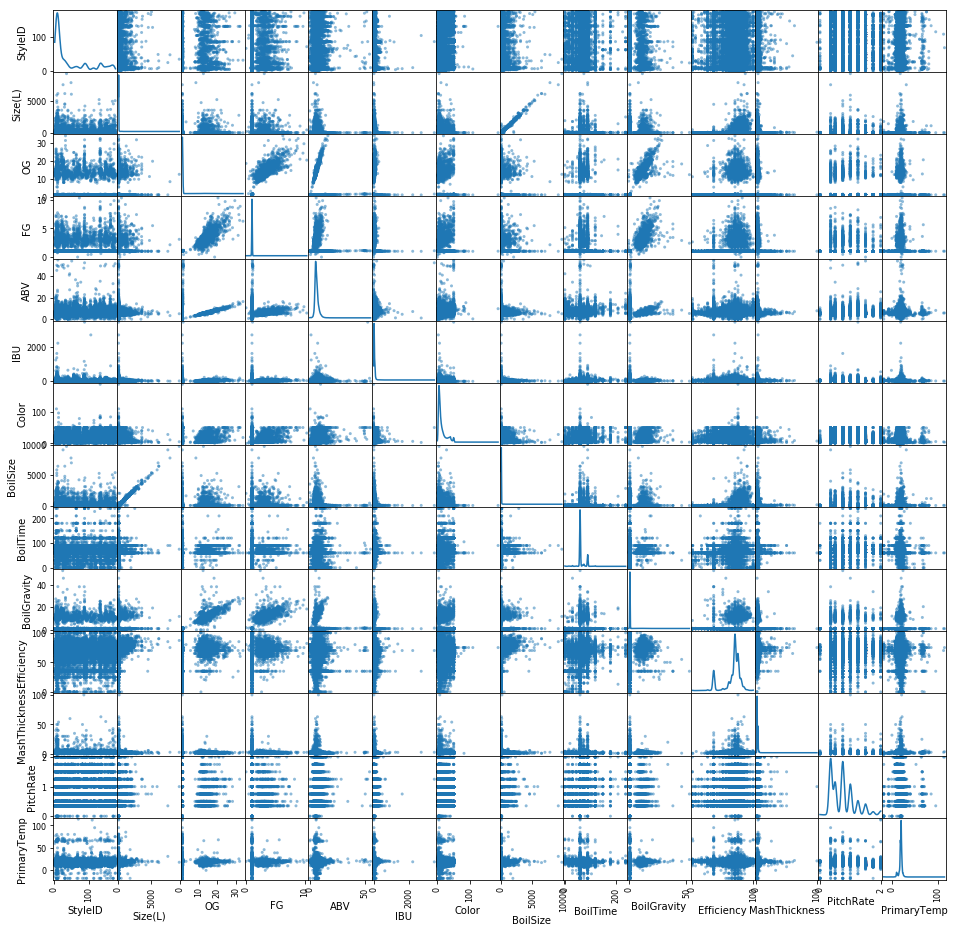

In [33]:
#This takes some time to load.
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(16, 16));

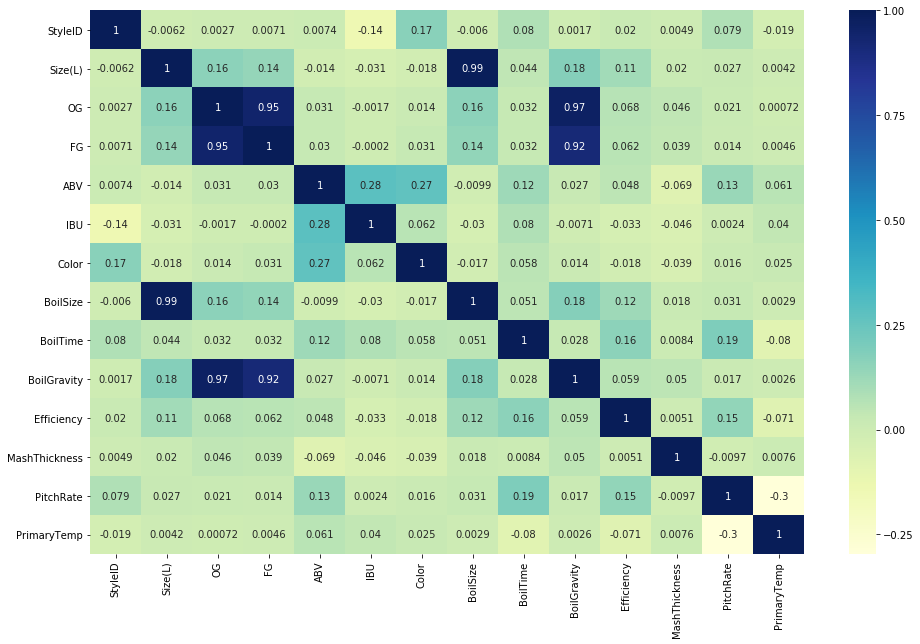

In [34]:
plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

<div style="font-size:16px; color:darkblue;">
    Common Styles and Names.
</div>

Text(0.5,1,'Frequency of top 10 styles in data')

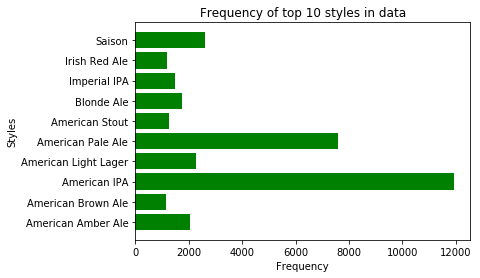

In [35]:
top_10_styles = dfClean.groupby('Style').count()['Name'].sort_values(ascending=False)[0:10]
plt.barh(top_10_styles.index[::-1], top_10_styles.values[::-1], color='green')
plt.xlabel('Frequency')
plt.ylabel('Styles')
plt.title('Frequency of top 10 styles in data')

Text(0.5,1,'Frequency of top 10 names in data')

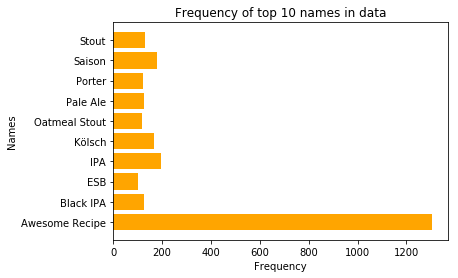

In [36]:
top_10_names = dfClean.groupby('Name').count()['Style'].sort_values(ascending=False)[0:10]
plt.barh(top_10_names.index[::-1], top_10_names.values[::-1], color='orange')
plt.xlabel('Frequency')
plt.ylabel('Names')
plt.title('Frequency of top 10 names in data')

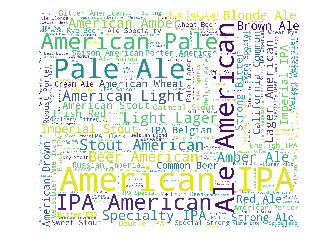

In [37]:
wordcloud_style = wordcloud.WordCloud(background_color='white',width=1200,height=1000).generate(' '.join(dfClean['Style']))


plt.imshow(wordcloud_style)
plt.axis('off')
plt.show()

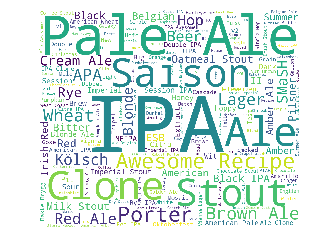

In [38]:
wordcloud_name = wordcloud.WordCloud(background_color='white',width=1200,height=1000).generate(' '.join(dfClean['Name']))


plt.imshow(wordcloud_name)
plt.axis('off')
plt.show()

<div style="font-size:16px; color:darkblue;">
    I have added both box plots and histograms, we can decide which visualization method we like most.
</div>

<div style="font-size:16px; color:darkblue;">
    General distributions.
</div>

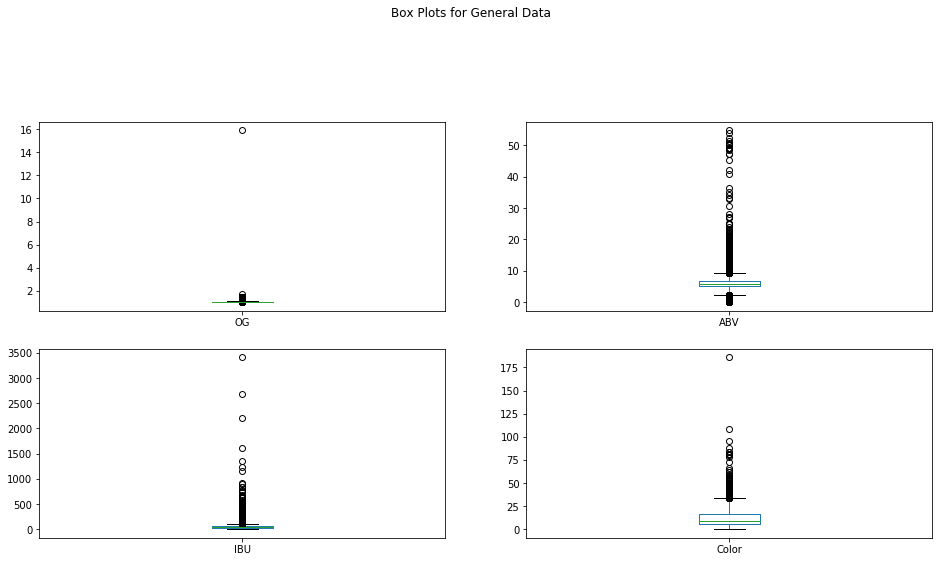

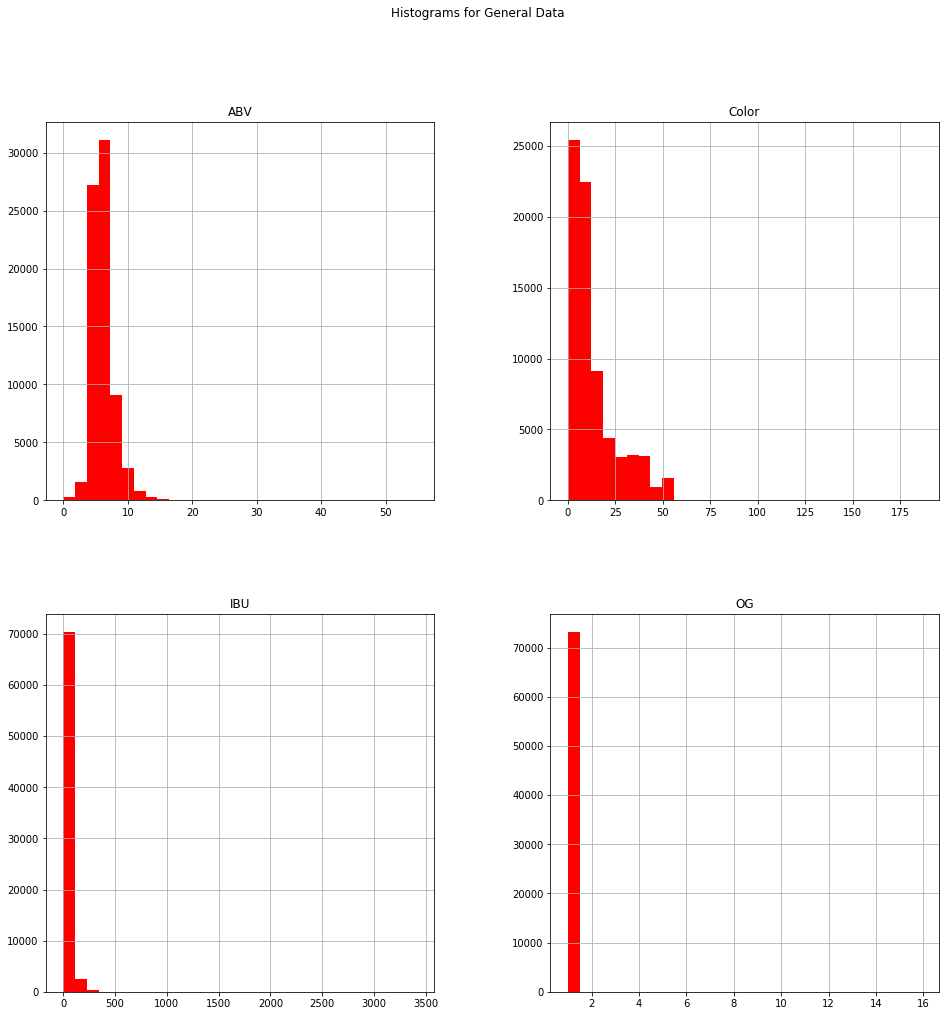

In [39]:
dfNumeric = dfClean[['OG', 'ABV', 'IBU', 'Color']]
dfNumeric.plot(kind='box',subplots=True,layout=(4,2),sharex=False,
                                              sharey=False,figsize=(16,16), title='Box Plots for General Data')
dfNumeric.hist(bins=30, figsize=(16,16), color='red')
plt.suptitle('Histograms for General Data')
plt.show()

<div style="font-size:16px; color:darkblue;">
    Individual style disributions.
</div>

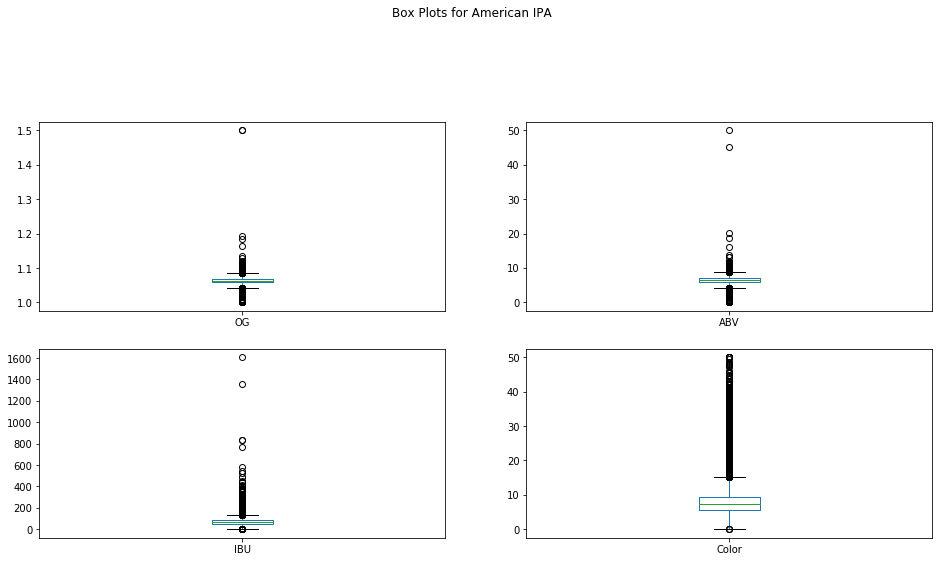

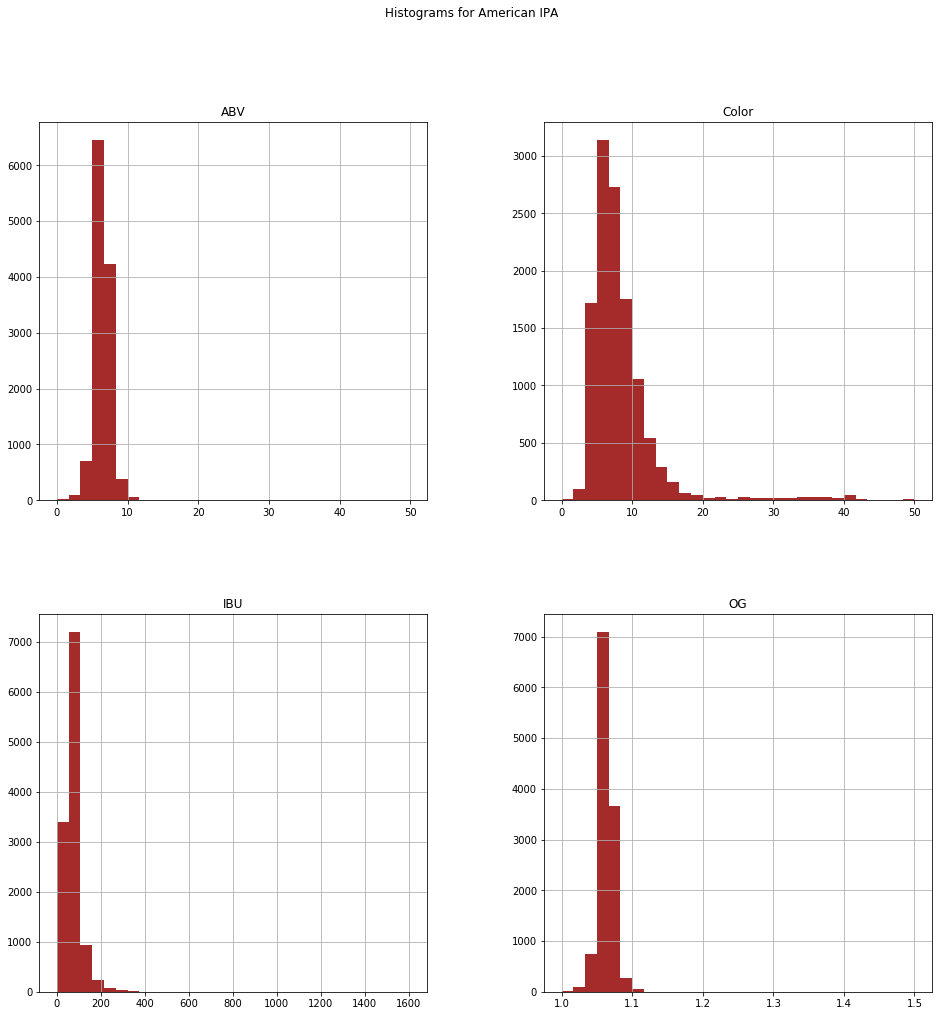

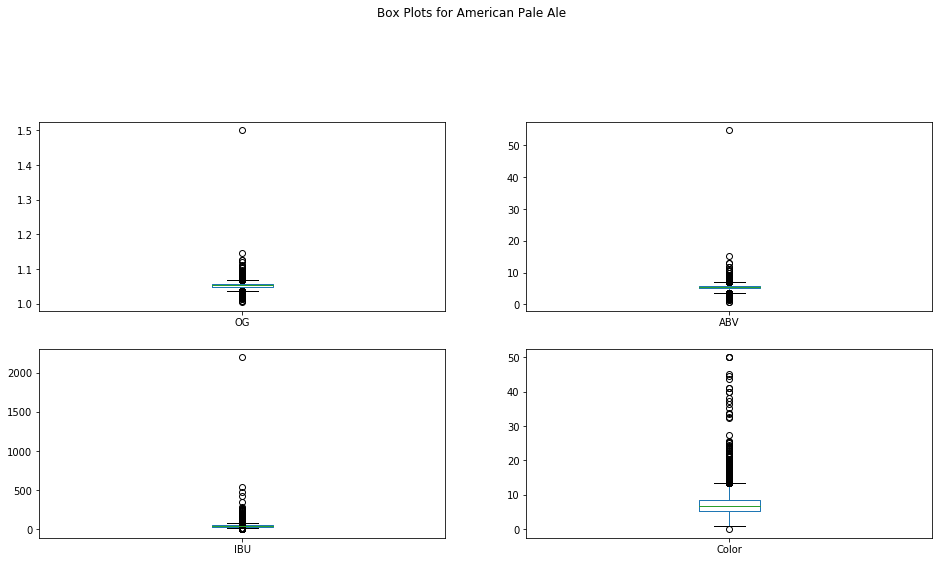

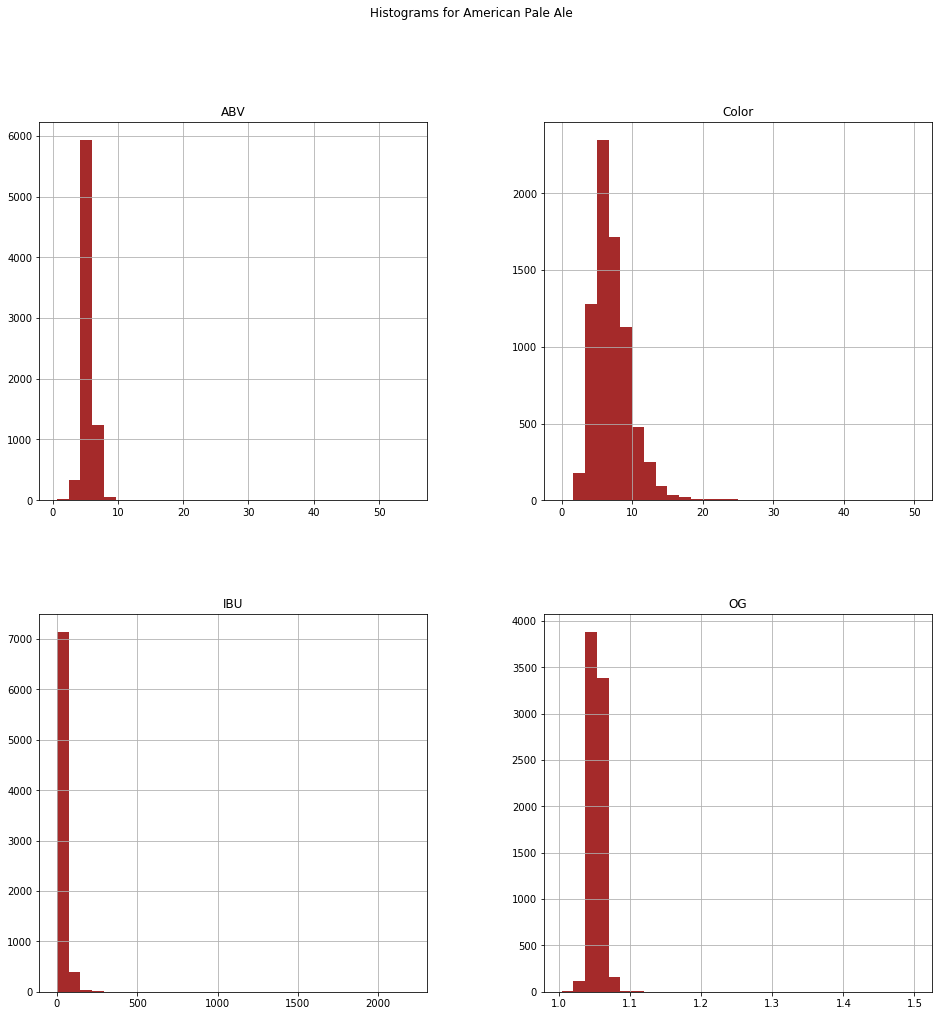

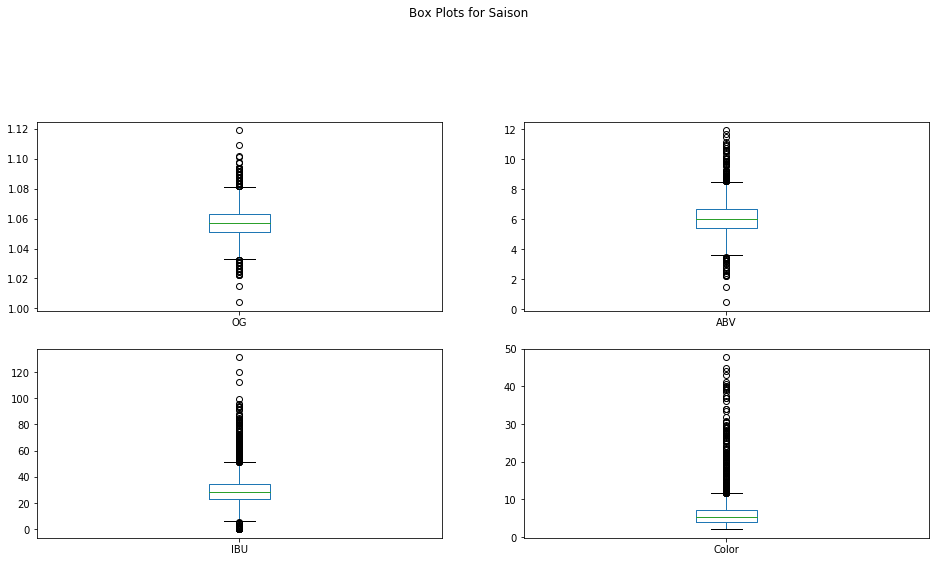

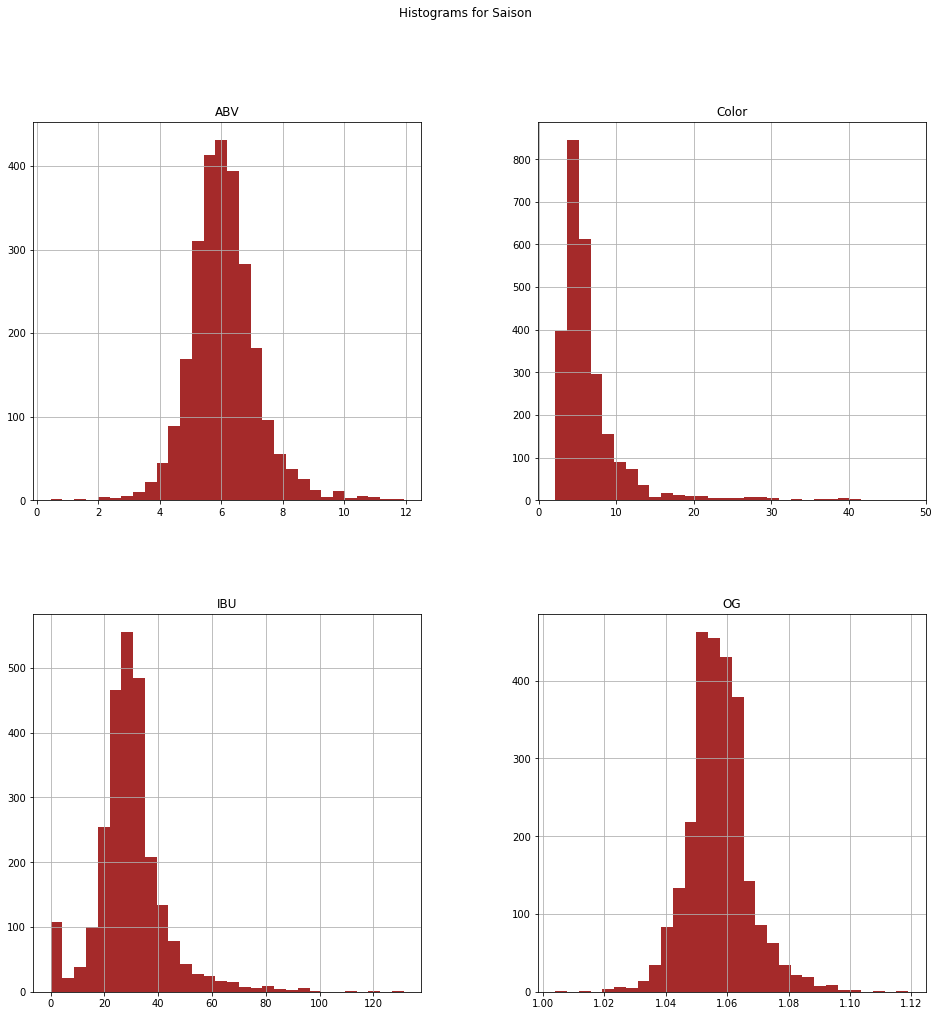

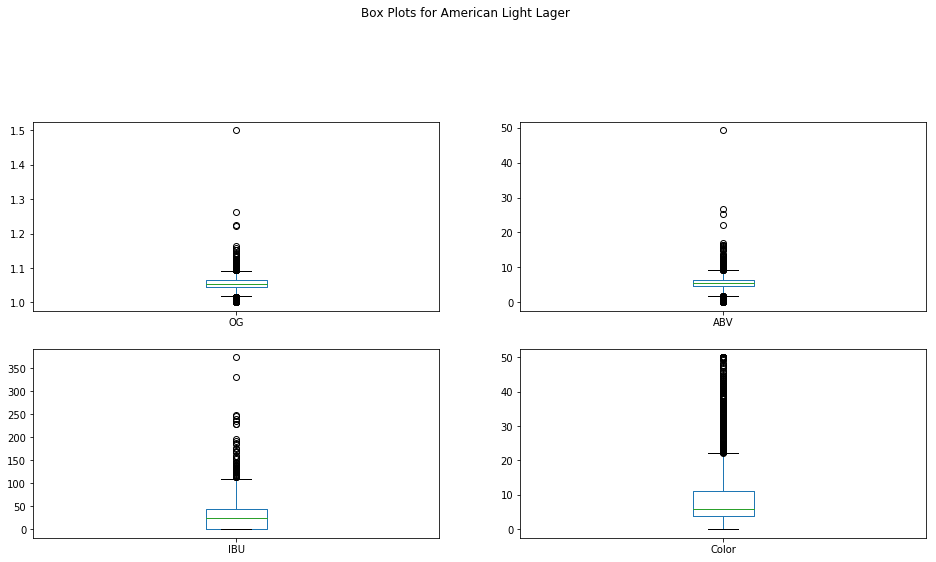

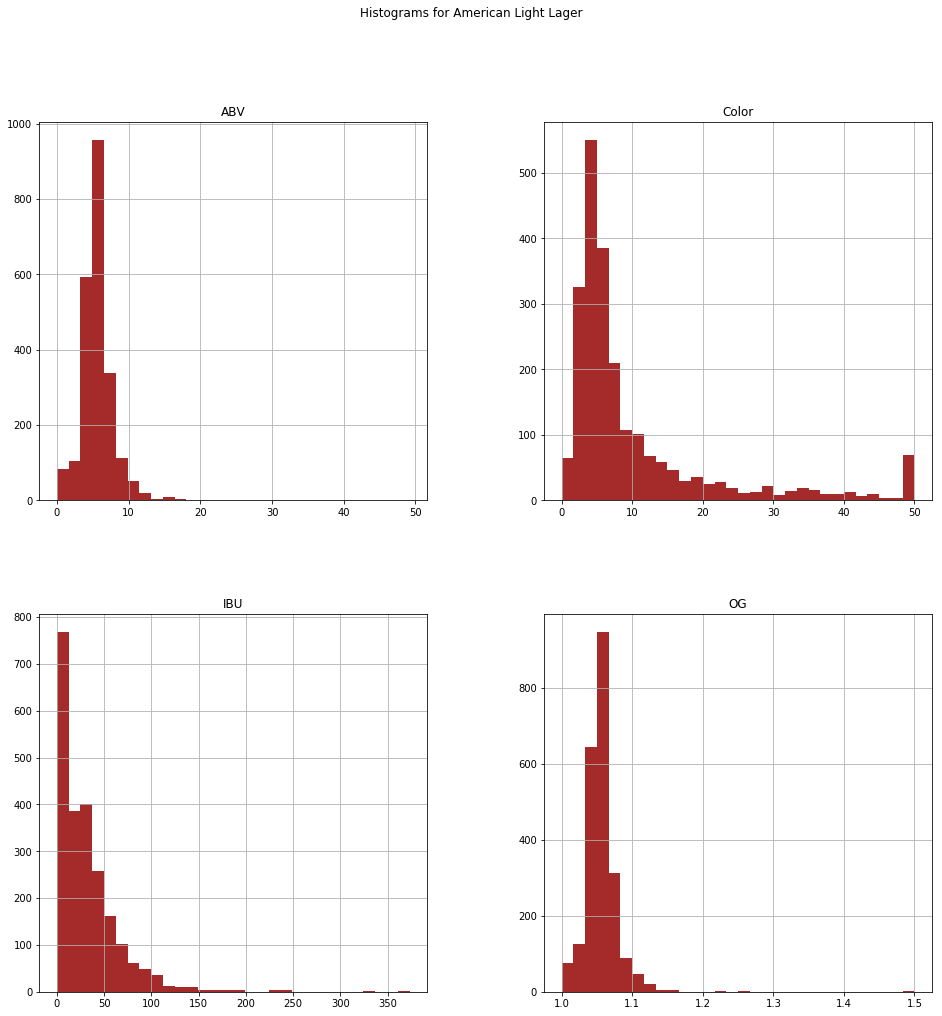

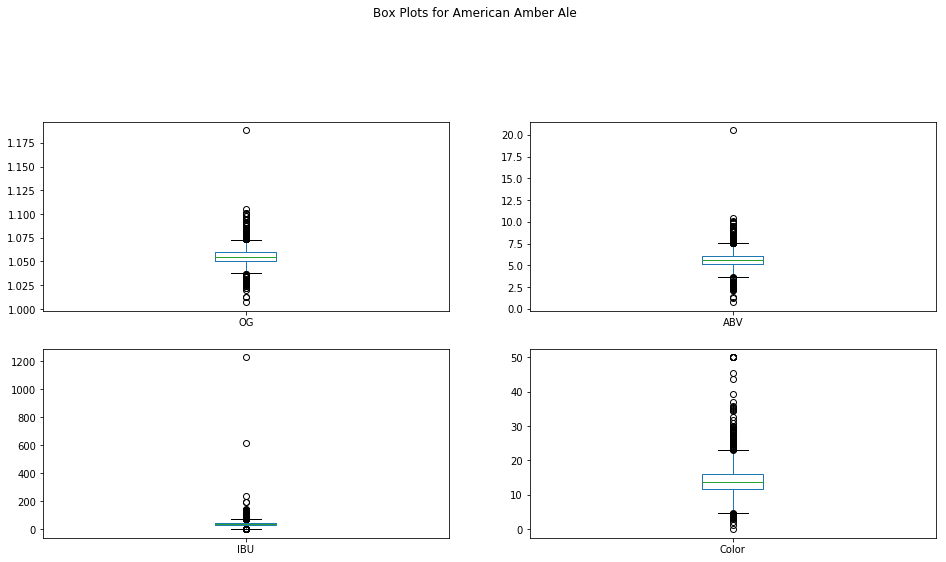

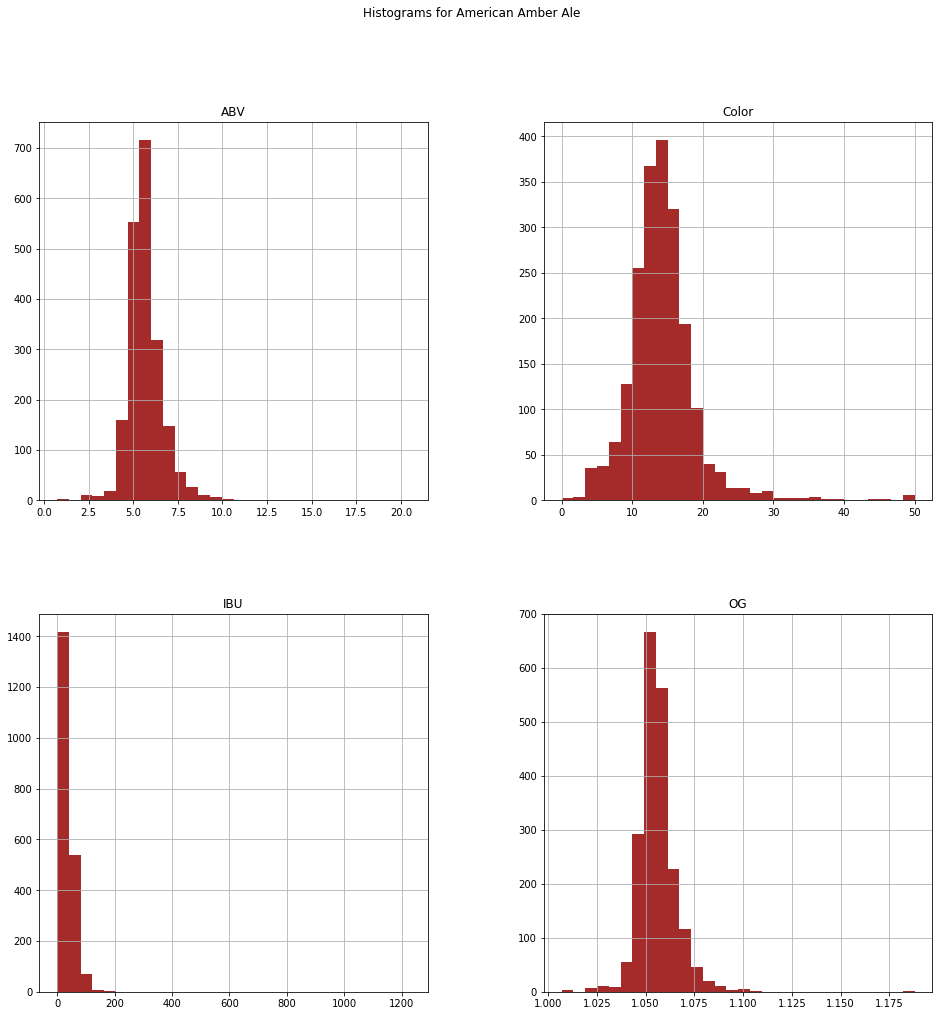

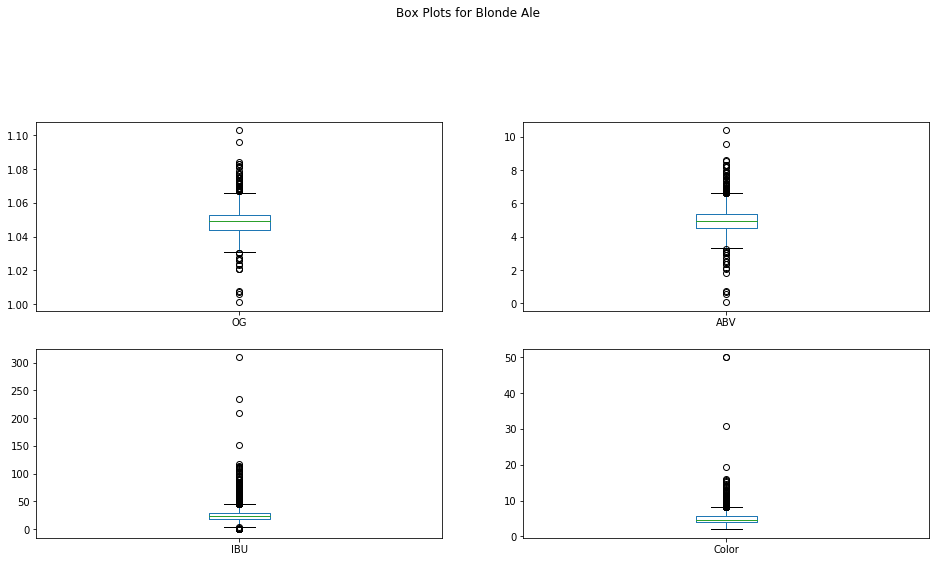

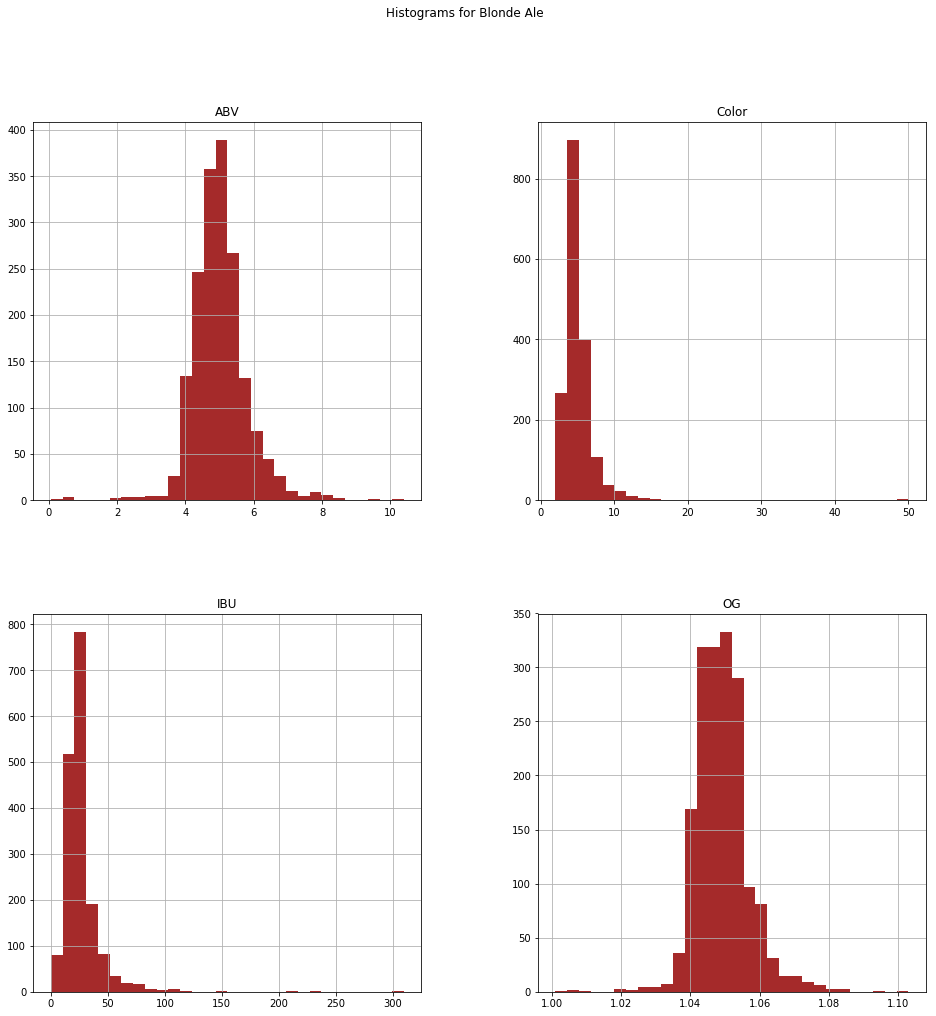

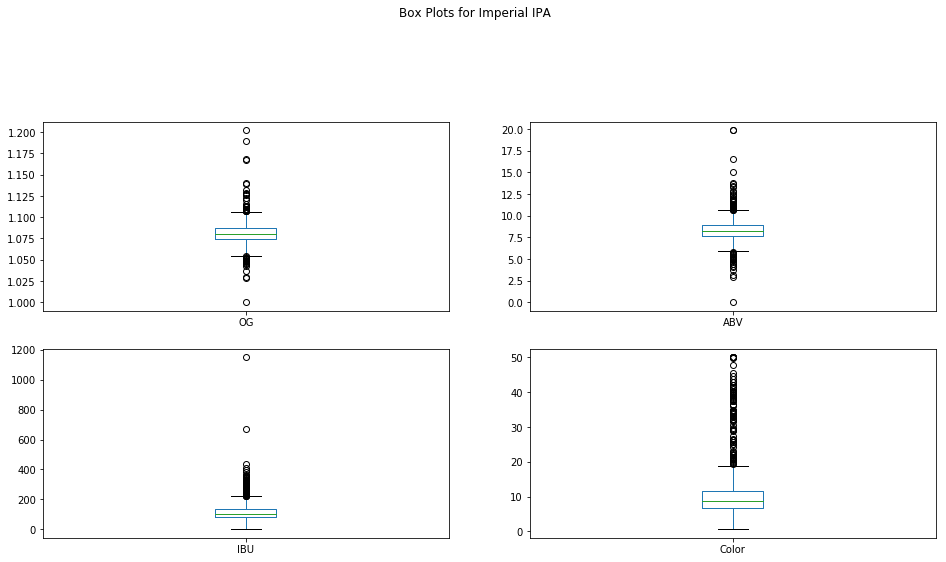

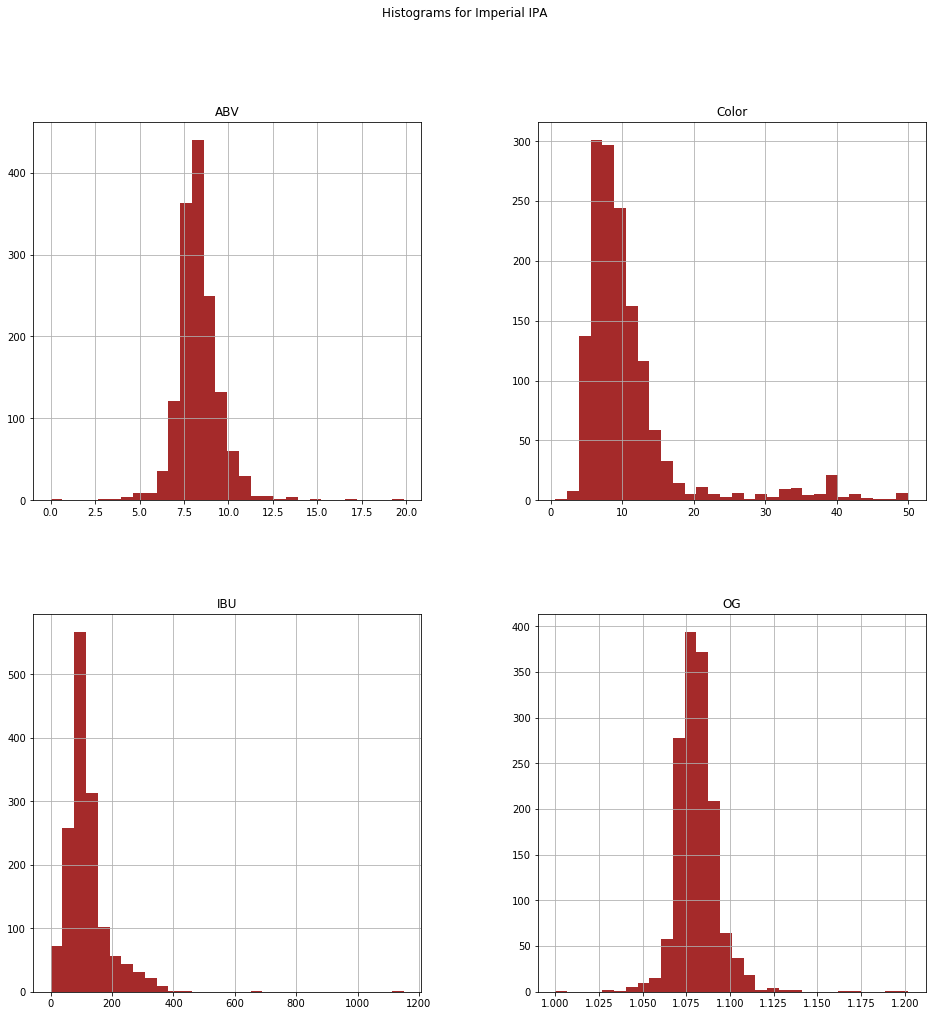

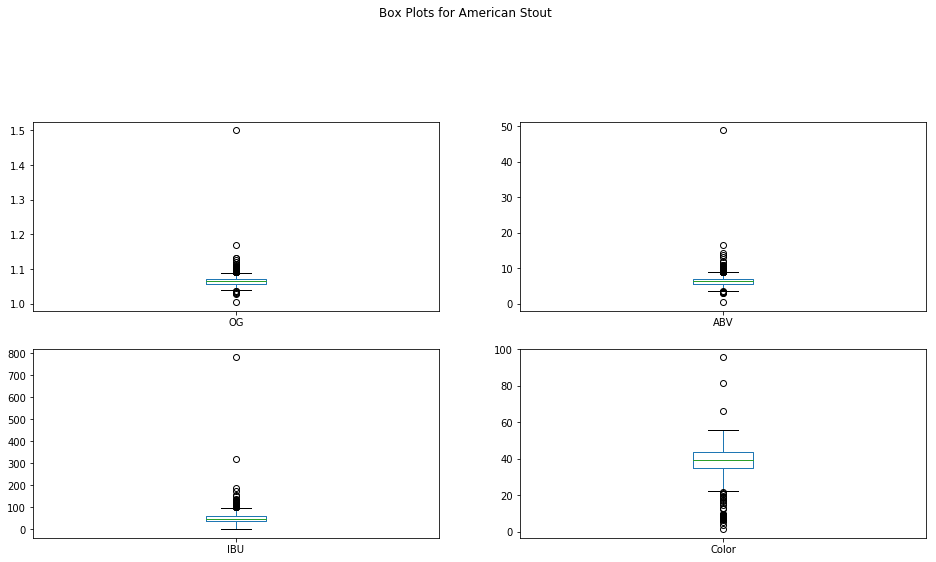

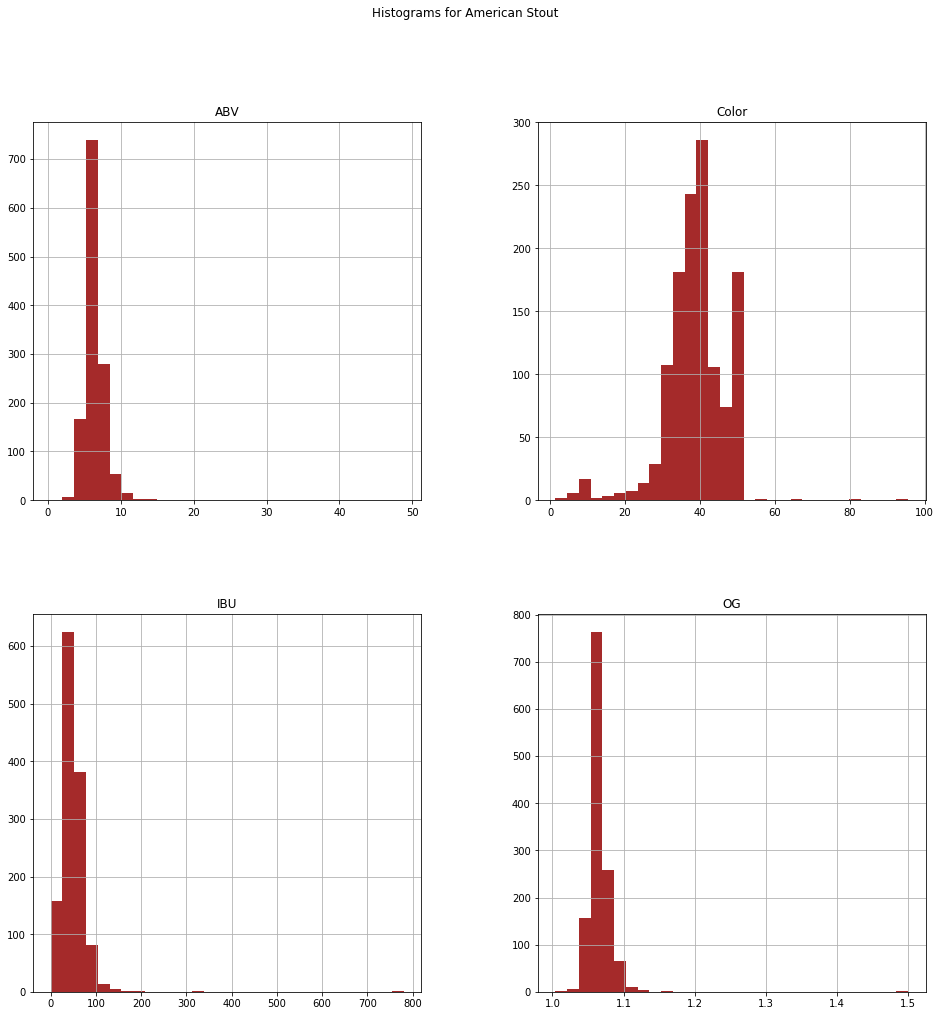

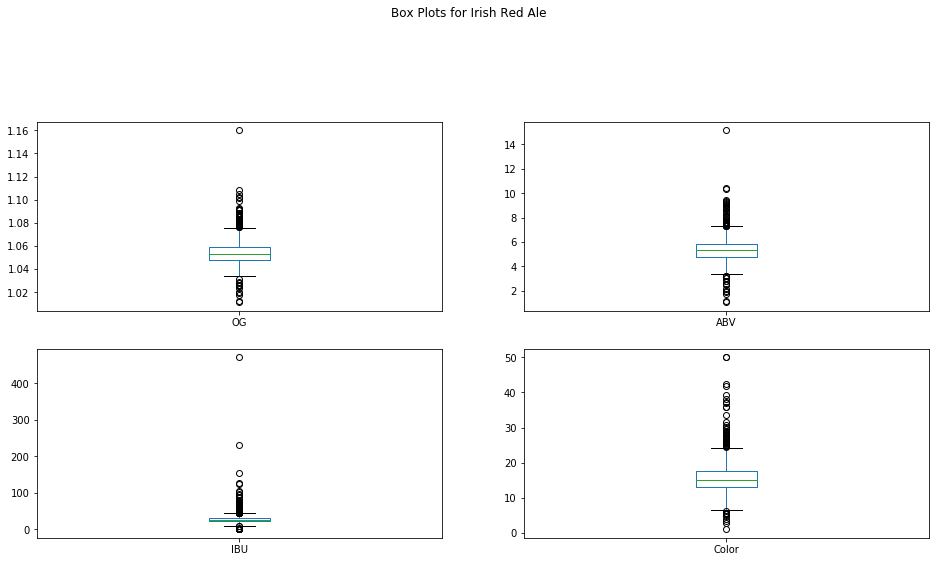

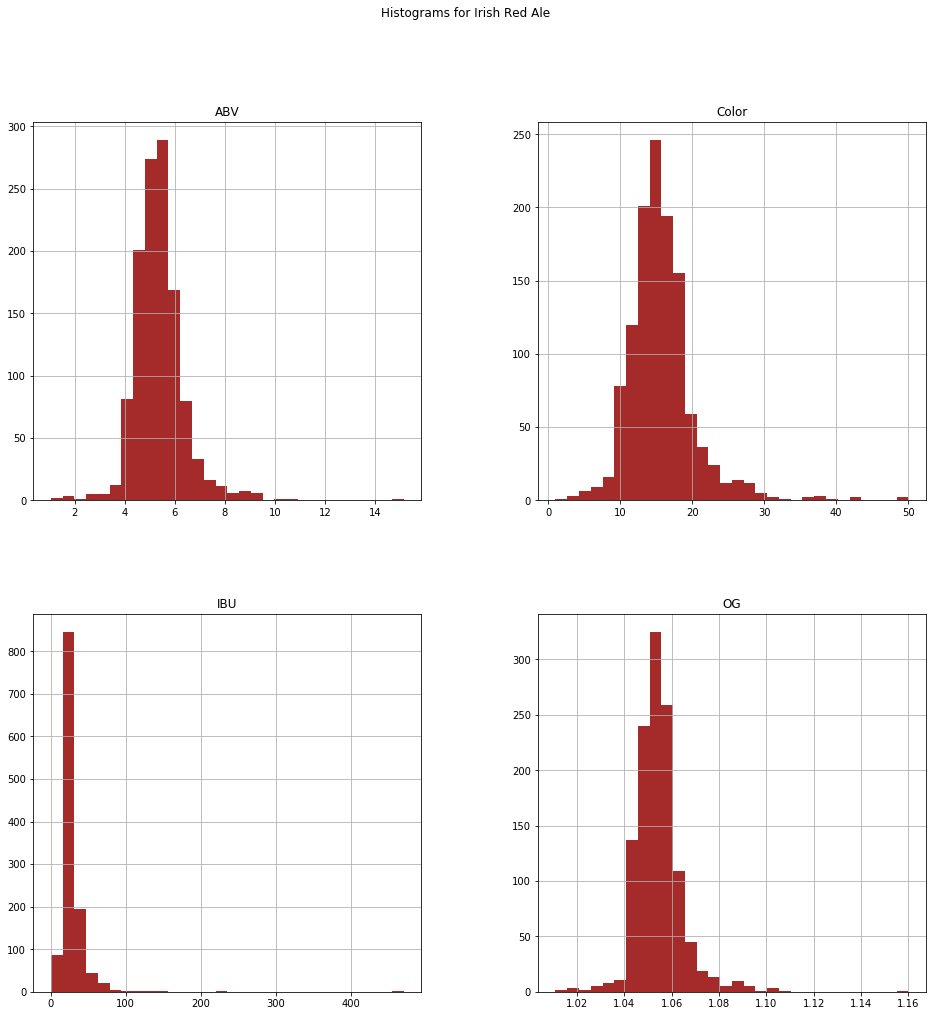

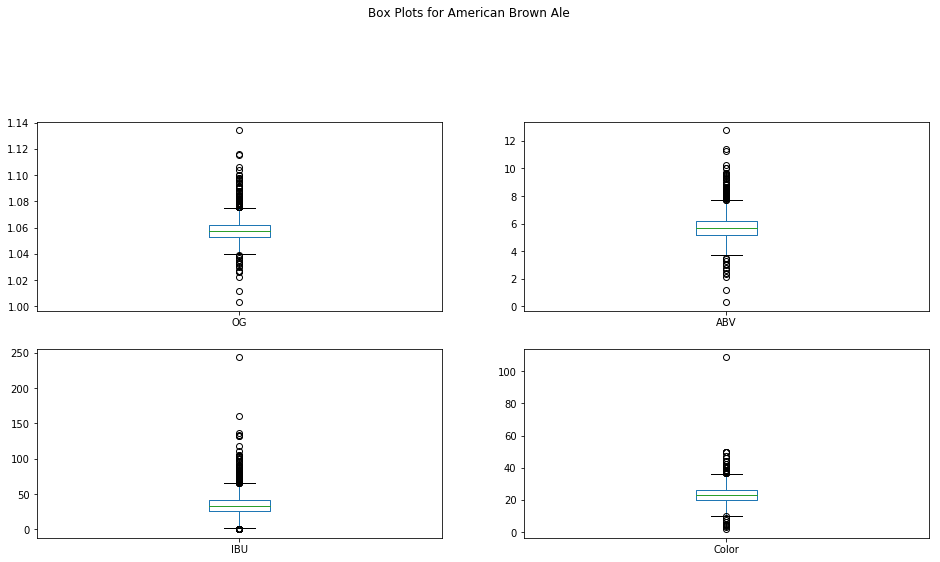

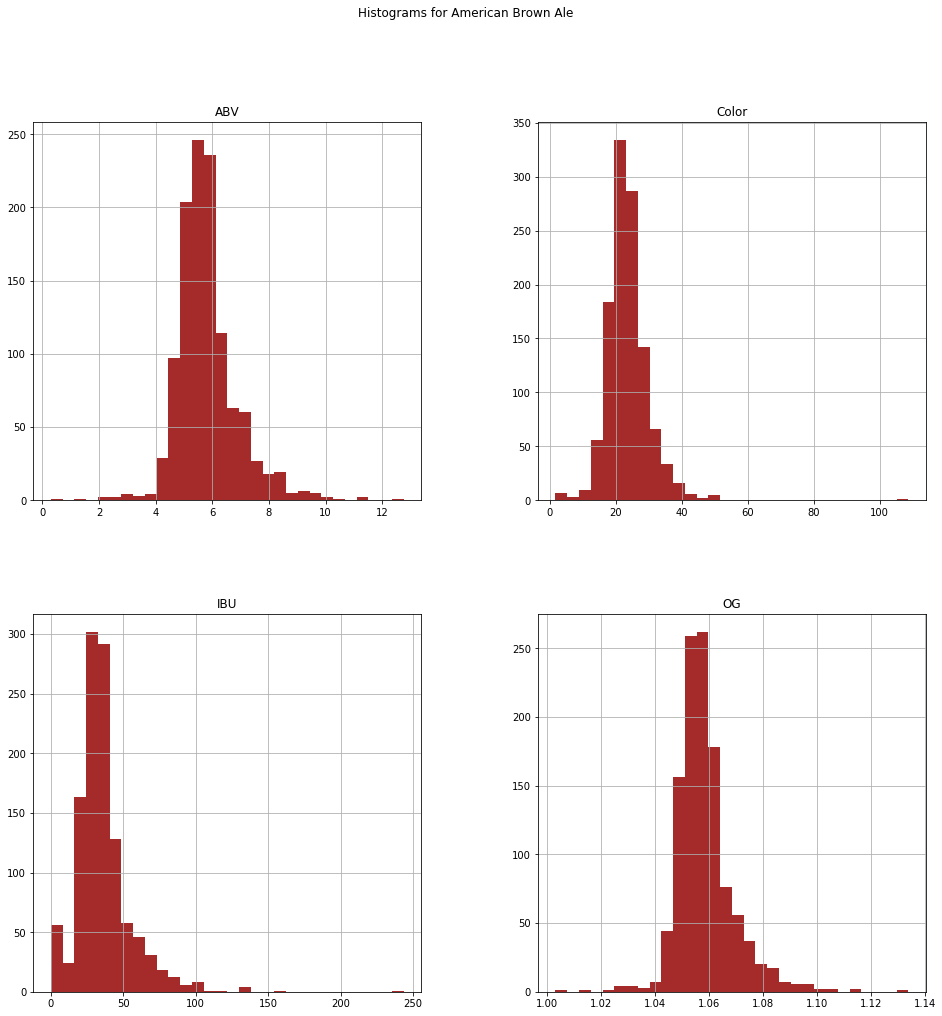

In [40]:
dfStyleAndNumeric = dfClean[['Style', 'OG', 'ABV', 'IBU', 'Color']]

for style in top_10_styles.index:
    dfStyleAndNumeric[dfStyleAndNumeric['Style']==style].plot(kind='box',subplots=True,layout=(4,2),sharex=False,
                                              sharey=False,figsize=(16,16), title='Box Plots for {}'.format(style))
    dfStyleAndNumeric[dfStyleAndNumeric['Style']==style].hist(bins=30, figsize=(16,16), color='brown')
    plt.suptitle('Histograms for {}'.format(style))
    plt.show()

<div style="font-size:16px; color:darkblue;">
    Comparison of different style classification models.
</div>

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    dfNumeric, dfClean['StyleID'], random_state=0)

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.21
Accuracy of Logistic regression classifier on test set: 0.21


In [43]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.22


In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.45
Accuracy of K-NN classifier on test set: 0.28


In [45]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.26
Accuracy of LDA classifier on test set: 0.26


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.26
Accuracy of GNB classifier on test set: 0.27


In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))